In [ ]:
//@version=6
//indicator("v5", overlay = true, max_labels_count = 300, max_lines_count = 300, max_boxes_count = 300, max_bars_back = 300)
indicator("Sunstoic", "v5", true, max_bars_back = 5000, max_boxes_count = 500, max_lines_count = 500, max_labels_count = 500)


//candle logic
// === Inputs ===
bCol = input.color(#008080, title="Bull Border")
rCol = input.color(#e20000, title="Bear Border")
bgB = input.color(color.new(#008080, 20), title="Bull Body")
bgR = input.color(color.new(#FF0000, 20), title="Bear Body")


    // === Input your time zone (Manila = GMT+8) 
timeSessionStart = timestamp("GMT+8", year, month, dayofmonth, 6, 0)  // Start of day
isNewDay = ta.change(time("D"))  // Detect new day

// Track the current day's developing close on each bar
var float devClose = na
if bool(isNewDay)
    devClose := close  // reset on new day
else
    devClose := close  // update each bar


// === Default Daily Candle (6:00 AM) ===
dO = request.security(syminfo.tickerid, "D", open)
dH = request.security(syminfo.tickerid, "D", high)
dL = request.security(syminfo.tickerid, "D", low)
dC = request.security(syminfo.tickerid, "D", close)


// Calculate daily high and low using 'day' timeframe
var float dailyHigh = na
var float dailyLow = na
newDay = ta.change(time("D"))


// On new day, reset high/low
if bool(newDay)
    dailyHigh := close
    dailyLow := open
else
    dailyHigh := math.max(dailyHigh, close)
    dailyLow := math.min(dailyLow, open)


// Midpoint of the daily candle
midPrice = (dailyHigh + dailyLow) / 2


dBull = dC >= dO
dCol = dBull ? bCol : rCol
dBg = dBull ? bgB : bgR


// Offset for visuals
ofs = 10
bw = 2
rIdx = bar_index + ofs + bw / 2
lIdx = bar_index + ofs - bw / 2
xMid = int(bar_index + ofs)


// Body of daily candle box
var box dBx = na
box.delete(dBx)
tB = math.max(dO, devClose) //y=dC
bB = math.min(dO, devClose)
dBx := box.new(left=int(lIdx), right=int(rIdx), top=tB, bottom=bB, border_color=dCol, bgcolor=dBg)


// Wicks for daily candle
var line dW1 = na
var line dW2 = na
line.delete(dW1)
line.delete(dW2)
dW1 := line.new(x1=xMid, y1=dH, x2=xMid, y2=tB, color=dCol)
dW2 := line.new(x1=xMid, y1=bB, x2=xMid, y2=dL, color=dCol)



// Labels for daily candle
var label lblO = na
var label lblH = na
var label lblL = na
var label lblC = na
label.delete(lblO)
label.delete(lblH)
label.delete(lblL)
label.delete(lblC)


lblStyle = label.style_label_right
lblSize = size.tiny
lblOfs = -2

lblO := label.new(x=xMid + lblOfs, y=dO, text="6O " + str.tostring(dO, "#"), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)
lblH := label.new(x=xMid + lblOfs, y=dH, text="6H " + str.tostring(dH, "#"), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)
lblL := label.new(x=xMid + lblOfs, y=dL, text="6L " + str.tostring(dL, "#"), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)
lblC := label.new(x=xMid + lblOfs, y=devClose, text="6C " + str.tostring(dC, "#"), style=lblStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=lblSize)

// === Custom Daily Candle (8:00 AM Manila) ===
sh = 24
sm = 0
st = timestamp("UTC", year, month, dayofmonth, sh, sm)


var float cO = na
var float cH = na
var float cL = na
var float cC = na


if (time == st)
    cO := open
    cH := high
    cL := low
    cC := close


if (not na(cO))
    cH := math.max(cH, high)
    cL := math.min(cL, low)
    cC := close


cBull = cC >= cO
cCol = cBull ? bCol : rCol
cBg = cBull ? bgB : bgR


cOfs = 12
cbw = 2
crIdx = bar_index + cOfs + cbw / 2
clIdx = bar_index + cOfs - cbw / 2
cX = int(bar_index + cOfs)


// Custom body box
var box cBx = na
box.delete(cBx)
ctB = math.max(cO, devClose) //y=dC
cbB = math.min(cO, devClose)
cBx := box.new(left=int(clIdx), right=int(crIdx), top=ctB, bottom=cbB, border_color=cCol, bgcolor=cBg)


// Custom wicks
var line cW1 = na
var line cW2 = na
line.delete(cW1)
line.delete(cW2)
cW1 := line.new(x1=cX, y1=cH, x2=cX, y2=ctB, color=cCol)
cW2 := line.new(x1=cX, y1=cbB, x2=cX, y2=cL, color=cCol)


// Custom labels
var label clO = na
var label clH = na
var label clL = na
var label clC = na
label.delete(clO)
label.delete(clH)
label.delete(clL)
label.delete(clC)


clStyle = label.style_label_left
clSize = size.tiny
clOfs = 2


clO := label.new(x=cX + clOfs, y=cO, text="8O " + str.tostring(cO, "#"), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
clH := label.new(x=cX + clOfs, y=cH, text="8H " + str.tostring(cH, "#"), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
clL := label.new(x=cX + clOfs, y=cL, text="8L " + str.tostring(cL, "#"), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)
clC := label.new(x=cX + clOfs, y=devClose, text="8C " + str.tostring(dC, "#"), style=clStyle, color=color.new(#2195f3, 100), textcolor=color.black, size=clSize)

// === High and Low Lines (using bar_index for x coords) ===
// Track bar_index of high and low bars within current day
var int highBarIndex = na
var int lowBarIndex = na
var float dayHigh = na
var float dayLow = na


startOfDay = timestamp(year, month, dayofmonth, 0, 0)
t6amManila = timestamp("Asia/Manila", year, month, dayofmonth, 6, 0)


issNewDay = ta.change(time("D"))


if (time >= startOfDay)
    if na(dayHigh) or high > dayHigh
        dayHigh := high
        highBarIndex := bar_index
    if na(dayLow) or low < dayLow
        dayLow := low
        lowBarIndex := bar_index


if bool(issNewDay)
    dayHigh := na
    dayLow := na
    highBarIndex := na
    lowBarIndex := na


// Draw high line from high bar index to current xMid
var line highLine = na
if not na(dayHigh) and not na(highBarIndex)
    if na(highLine)
        highLine := line.new(x1=highBarIndex, y1=dayHigh, x2=xMid, y2=dayHigh, color=dCol, width=2, style = line.style_solid)
    else
        line.set_xy1(highLine, highBarIndex, dayHigh)
        line.set_xy2(highLine, xMid, dayHigh)


// Draw low line from low bar index to current xMid
var line lowLine = na
if not na(dayLow) and not na(lowBarIndex)
    if na(lowLine)
        lowLine := line.new(x1=lowBarIndex, y1=dayLow, x2=xMid, y2=dayLow, color=dCol, width=2, style = line.style_solid)
    else
        line.set_xy1(lowLine, lowBarIndex, dayLow)
        line.set_xy2(lowLine, xMid, dayLow)





// --- 6:00 AM Asia/Manila horizontal line ---
// Manila 6:00 AM timestamp today
manila_6am = timestamp("GMT+8", year, month, dayofmonth, 30, 0)


// Detect bar where time crosses 6:00 AM Manila
isStartBar6am = (time >= manila_6am) and (time[1] < manila_6am)


// Store 6:00 AM bar open price and index
var float price6am = na
var int bar6am_index = na


if isStartBar6am
    price6am := open
    bar6am_index := bar_index


// Draw horizontal line from 6AM bar index to xMid at price6am
var line hLine6am = na


if not na(price6am) and not na(bar6am_index)
    line.delete(hLine6am)
    hLine6am := line.new(x1=bar6am_index, y1=price6am, x2=xMid, y2=price6am, color=color.new(#ecc900, 0), width=1, style=line.style_solid)


// --- 8:00 AM Asia/Manila horizontal line ---
// Detect bar where time crosses 8:00 AM Manila
isStartBar8am = (time >= st) and (time[1] < st)


// Store 8:00 AM bar open price and index
var float price8am = na
var int bar8am_index = na


if isStartBar8am
    price8am := open
    bar8am_index := bar_index


// Draw horizontal line from 8AM bar index to cX at price8am
var line hLine8am = na
var line hhLine8am = na


if not na(price8am) and not na(bar8am_index)
    line.delete(hLine8am)
    hLine8am := line.new(x1=bar8am_index, y1=price8am, x2=cX, y2=price8am, color=color.new(#fad400, 0), width=1, style=line.style_solid)



// Draw horizontal line that updates000000000000000000000000
var line devCloseLine = na
var line ddevCloseLine = na
if bar_index > 0
    if na(devCloseLine)
        devCloseLine := line.new(x1=bar_index, y1=devClose , x2=xMid , y2=devClose, style = line.style_solid, color=color.new(#ecc900, 0), width=1)
    else
        line.set_xy1(devCloseLine, bar_index, devClose)
        line.set_xy2(devCloseLine, bar_index + 13, devClose)
    if na(ddevCloseLine) 
        //ddevCloseLine := line.new(x1=xMid, y1=devClose, x2=xMid, y2=devClose, extend=extend.right, color=dCol, width=2)
        ddevCloseLine := line.new(x1=xMid, y1=devClose, x2=xMid , y2=devClose, style = line.style_dotted, extend=extend.right, color=color.black, width=1)
    else
        line.set_xy1(ddevCloseLine, bar_index + 19,  devClose)
        line.set_xy2(ddevCloseLine, bar_index + 20, devClose)



//zone logic
// Disable visuals if timeframe is higher than 1 hour
isValidTF = timeframe.isminutes and timeframe.multiplier <= 60


// Current time components
currentTime = timestamp(year, month, dayofmonth, hour, minute)

// Define 12PM to 12AM session
start12pm = timestamp(year, month, dayofmonth, 12, 0)
end12am = timestamp(year, month, dayofmonth, 23, 59)
in12pmTo12am = currentTime >= start12pm and currentTime <= end12am

// Define 8AM to 8PM session
start8am = timestamp(year, month, dayofmonth, 8, 0)
end8pm = timestamp(year, month, dayofmonth, 20, 0)
in8amTo8pm = currentTime >= start8am and currentTime <= end8pm

// Define 6PM to 8PM session
start6pm = timestamp(year, month, dayofmonth, 6, 0)
eend8pm = timestamp(year, month, dayofmonth, 8, 0)
in6pmTo8pm = currentTime >= start6pm and currentTime <= eend8pm

start6am = timestamp(year, month, dayofmonth, 18, 0)
eend8am = timestamp(year, month, dayofmonth, 20, 0)
in6amTo8am = currentTime >= start6am and currentTime <= eend8am

// Apply background highlights
bgcolor(isValidTF and in12pmTo12am ? color.new(color.black, 99) : na)
bgcolor(isValidTF and in8amTo8pm ? color.new(color.black, 99) : na)
bgcolor(isValidTF and in6pmTo8pm ? color.new(color.black, 97) : na)
bgcolor(isValidTF and in6amTo8am ? color.new(color.black, 95) : na)

// Get the current day of the week and the current time
isMonday = dayofweek == dayofweek.sunday
ccurrentTime = timestamp(year, month, dayofmonth, hour, minute)

// Define the time range for 6:00 AM to 8:00 AM
startTime = timestamp(year, month, dayofmonth, 18, 6) // 6:00 AM
endTime = timestamp(year, month, dayofmonth, 20, 0) // 8:00 AM

// Check if it's Monday and the current time is within the range of 6:00 AM to 8:00 AM
isInTimeRange = isMonday and ccurrentTime >= startTime and ccurrentTime <= endTime

// Highlight the area with a background color
bgcolor(isValidTF and isInTimeRange ? color.new(color.blue, 90) : na)

// Vertical lines logic
// Only show vertical lines if timeframe is intraday and valid
showLines = timeframe.isintraday and isValidTF

// Convert current bar time to Asia/Manila timezone
t = time(timeframe.period, 'Asia/Manila')

// Target hours excluding 0, 12, 20
var array<int> targetHours = array.from(3, 6, 8, 15, 24) // 24 means midnight (0h)

// Special hours separated
specialHour20 = 20
specialHour0 = 0 // midnight
specialHour12 = 12 // noon

// Function to check if current bar time matches any target hour exactly at minute zero
isTargetTime() =>
    h = hour(t)
    m = minute(t)
    match = false
    for i = 0 to array.size(targetHours) - 1 by 1
        if (h == array.get(targetHours, i) or h == 0 and array.get(targetHours, i) == 24) and m == 0
            match := true
            match
    match

// Check if current time matches special hour 20 at minute zero
isSpecialTime20() =>
    h = hour(t)
    m = minute(t)
    h == specialHour20 and m == 0

// Check if current time matches special hour 0 at minute zero
isSpecialTime0() =>
    h = hour(t)
    m = minute(t)
    h == specialHour0 and m == 0

// Check if current time matches special hour 12 at minute zero
isSpecialTime12() =>
    h = hour(t)
    m = minute(t)
    h == specialHour12 and m == 0

// Detect new day (day break)
nnewDay = ta.change(time('D'))

// Only draw lines if timeframe is intraday and valid
if showLines
    // Draw vertical line at day break (green, width 1)
    if bool(nnewDay)
        line.new(bar_index, low - 10 * syminfo.mintick, bar_index, high + 10 * syminfo.mintick, color = color.rgb(76, 175, 79, 30), width = 1, extend = extend.both)

    // Draw vertical line at target times (blue, width 1)
    if isTargetTime()
        line.new(bar_index, low - 10 * syminfo.mintick, bar_index, high + 10 * syminfo.mintick, color = color.rgb(33, 149, 243, 90), width = 1, extend = extend.both)

    // Draw vertical line at special hour 20 (teal, width 1)
    if isSpecialTime20()
        line.new(bar_index, low - 10 * syminfo.mintick, bar_index, high + 10 * syminfo.mintick, color = color.new(color.teal, 50), width = 1, extend = extend.both)

    // Draw vertical line at special hour 0 (midnight) - orange, dotted
    if isSpecialTime0()
        var line midnightLine = na
        midnightLine := line.new(bar_index, low - 10 * syminfo.mintick, bar_index, high + 10 * syminfo.mintick, color = color.orange, width = 1, extend = extend.both)
        line.set_style(midnightLine, line.style_dotted)

    // Draw vertical line at special hour 12 (noon) - red, dotted
    if isSpecialTime12()
        var line noonLine = na
        noonLine := line.new(bar_index, low - 10 * syminfo.mintick, bar_index, high + 10 * syminfo.mintick, color = color.red, width = 1, extend = extend.both)
        line.set_style(noonLine, line.style_dotted)

//hourly logic
// === UTILITY FUNCTION ===
f_show(tf) =>
    timeframe.period != tf

// === HOURLY ===
hH = request.security(syminfo.tickerid, '60', high, lookahead = barmerge.lookahead_on)
hL = request.security(syminfo.tickerid, '60', low, lookahead = barmerge.lookahead_on)
hIdx = request.security(syminfo.tickerid, '60', bar_index, lookahead = barmerge.lookahead_on)

var int hPrev = na
var float hHi = na
var int hHiBar = na
var line hHiLine = na
var bool hHiOn = false
var float hLo = na
var int hLoBar = na
var line hLoLine = na
var bool hLoOn = false

if hIdx != hPrev
    hPrev := hIdx
    hHi := na
    hHiBar := na
    line.delete(hHiLine)
    hHiLine := na
    hHiOn := false
    hLo := na
    hLoBar := na
    line.delete(hLoLine)
    hLoLine := na
    hLoOn := false
    hLoOn

if hHiOn and not na(hHiLine)
    bMin = math.min(open, close)
    bMax = math.max(open, close)
    if hHi <= bMax and hHi >= bMin
        line.set_x2(hHiLine, bar_index)
        line.set_y2(hHiLine, hHi)
        hHiOn := false
        hHiOn
    else
        line.set_x2(hHiLine, bar_index)
        line.set_y2(hHiLine, hHi)

if hLoOn and not na(hLoLine)
    bMin = math.min(open, close)
    bMax = math.max(open, close)
    if hLo <= bMax and hLo >= bMin
        line.set_x2(hLoLine, bar_index)
        line.set_y2(hLoLine, hLo)
        hLoOn := false
        hLoOn
    else
        line.set_x2(hLoLine, bar_index)
        line.set_y2(hLoLine, hLo)

// === 30M ===
tH = request.security(syminfo.tickerid, '30', high, lookahead = barmerge.lookahead_on)
tL = request.security(syminfo.tickerid, '30', low, lookahead = barmerge.lookahead_on)
tO = request.security(syminfo.tickerid, '30', open, lookahead = barmerge.lookahead_on)
tC = request.security(syminfo.tickerid, '30', close, lookahead = barmerge.lookahead_on)
tIdx = request.security(syminfo.tickerid, '30', bar_index, lookahead = barmerge.lookahead_on)

plot(tO, title = '30M Open', color = color.rgb(0, 20, 133, 80), style = plot.style_stepline_diamond, linewidth = 1)

isBull = tC > tO
isBear = tC < tO

phb = plot(isBull ? tH : na, color = color.new(#4caf4f, 100), style = plot.style_steplinebr)
plb = plot(isBull ? tL : na, color = color.new(#4caf4f, 100), style = plot.style_steplinebr)
phr = plot(isBear ? tH : na, color = color.new(#ff5252, 100), style = plot.style_steplinebr)
plr = plot(isBear ? tL : na, color = color.new(#ff5252, 100), style = plot.style_steplinebr)

fill(phb, plb, color = color.new(color.blue, 95))
fill(phr, plr, color = color.new(color.red, 95))

var int tPrev = na
var float tHi = na
var int tHiBar = na
var line tHiLine = na
var bool tHiOn = false
var float tLo = na
var int tLoBar = na
var line tLoLine = na
var bool tLoOn = false

if tIdx != tPrev
    tPrev := tIdx
    tHi := na
    tHiBar := na
    line.delete(tHiLine)
    tHiLine := na
    tHiOn := false
    tLo := na
    tLoBar := na
    line.delete(tLoLine)
    tLoLine := na
    tLoOn := false
    tLoOn

if tHiOn and not na(tHiLine)
    bMin = math.min(open, close)
    bMax = math.max(open, close)
    if tHi <= bMax and tHi >= bMin
        line.set_x2(tHiLine, bar_index)
        line.set_y2(tHiLine, tHi)
        tHiOn := false
        tHiOn
    else
        line.set_x2(tHiLine, bar_index)
        line.set_y2(tHiLine, tHi)

if tLoOn and not na(tLoLine)
    bMin = math.min(open, close)
    bMax = math.max(open, close)
    if tLo <= bMax and tLo >= bMin
        line.set_x2(tLoLine, bar_index)
        line.set_y2(tLoLine, tLo)
        tLoOn := false
        tLoOn
    else
        line.set_x2(tLoLine, bar_index)
        line.set_y2(tLoLine, tLo)

// === D/W/M High-Low Steplines ===
ddH = request.security(syminfo.tickerid, 'D', high, lookahead = barmerge.lookahead_on)
ddL = request.security(syminfo.tickerid, 'D', low, lookahead = barmerge.lookahead_on)
wH = request.security(syminfo.tickerid, 'W', high, lookahead = barmerge.lookahead_on)
wL = request.security(syminfo.tickerid, 'W', low, lookahead = barmerge.lookahead_on)
mH = request.security(syminfo.tickerid, 'M', high, lookahead = barmerge.lookahead_on)
mL = request.security(syminfo.tickerid, 'M', low, lookahead = barmerge.lookahead_on)

plot(f_show('60') ? hH : na, title = 'H High', color = color.new(color.black, 90), style = plot.style_stepline, linewidth = 2)
plot(f_show('60') ? hL : na, title = 'H Low', color = color.new(color.black, 90), style = plot.style_stepline, linewidth = 2)
plot(f_show('D') ? ddH : na, title = 'D High', color = color.new(color.green, 50), style = plot.style_stepline)
plot(f_show('D') ? ddL : na, title = 'D Low', color = color.new(color.green, 70), style = plot.style_stepline)
plot(f_show('W') ? wH : na, title = 'W High', color = color.new(color.blue, 50), style = plot.style_stepline)
plot(f_show('W') ? wL : na, title = 'W Low', color = color.new(color.blue, 70), style = plot.style_stepline)
plot(f_show('M') ? mH : na, title = 'M High', color = color.new(color.purple, 40), style = plot.style_stepline)
plot(f_show('M') ? mL : na, title = 'M Low', color = color.new(color.purple, 60), style = plot.style_stepline)


//vwap logic
// VWAP calculation from 1-minute data
f_vwap_calc() =>
    var float cumPV = 0.0
    var float cumVol = 0.0
    var float cumPV_buy = 0.0
    var float cumVol_buy = 0.0
    var float cumPV_sell = 0.0
    var float cumVol_sell = 0.0

    // Reset on new day
    if bool(ta.change(time('D')))
        cumPV := 0.0
        cumVol := 0.0
        cumPV_buy := 0.0
        cumVol_buy := 0.0
        cumPV_sell := 0.0
        cumVol_sell := 0.0
        cumVol_sell

    buyVol = close > open ? volume : 0.0
    sellVol = close < open ? volume : 0.0

    cumPV := cumPV + close * volume
    cumVol := cumVol + volume

    cumPV_buy := cumPV_buy + close * buyVol
    cumVol_buy := cumVol_buy + buyVol

    cumPV_sell := cumPV_sell + close * sellVol
    cumVol_sell := cumVol_sell + sellVol

    vwap = cumVol != 0 ? cumPV / cumVol : na
    buyVWAP = cumVol_buy != 0 ? cumPV_buy / cumVol_buy : na
    sellVWAP = cumVol_sell != 0 ? cumPV_sell / cumVol_sell : na

    [vwap, buyVWAP, sellVWAP]

// Pull 1-minute VWAP values
[vwap_1m, buyVWAP_1m, sellVWAP_1m] = request.security(syminfo.tickerid, '1', f_vwap_calc())

// Only show on intraday charts
showVWAP = not timeframe.isdaily and not timeframe.isweekly and not timeframe.ismonthly
 
// Plot VWAPs with conditional display
plot_vwap = plot(showVWAP ? vwap_1m : na, color = color.rgb(255, 153, 0, 0), linewidth = 1, title = 'VWAP (1m)')
plot_buy_vwap = plot(showVWAP ? buyVWAP_1m : na, color = color.rgb(0, 137, 123, 80), linewidth = 1, title = 'Buy Delta VWAP (1m)')
plot_sell_vwap = plot(showVWAP ? sellVWAP_1m : na, color = color.rgb(255, 82, 82, 80), linewidth = 1, title = 'Sell Delta VWAP (1m)')

// Fill areas
fill(plot_vwap, plot_buy_vwap, color = showVWAP ? color.new(color.teal, 95) : na, title = 'Buy VWAP Fill')
fill(plot_vwap, plot_sell_vwap, color = showVWAP ? color.new(color.red, 95) : na, title = 'Sell VWAP Fill')

//table logic
// === Function to get OHLC of specified candle ===
get_prev_ohlc(tf, shift) =>
    o = request.security(syminfo.tickerid, tf, open[shift])
    h = request.security(syminfo.tickerid, tf, high[shift])
    l = request.security(syminfo.tickerid, tf, low[shift])
    c = request.security(syminfo.tickerid, tf, close[shift])
    [o, h, l, c]

// === Function to calculate ranges and colors ===
get_data(tf, shift) =>
    [o, h, l, c] = get_prev_ohlc(tf, shift)
    full_range = h - l
    oc_range = math.abs(c - o)
    hl_range = h - l
    is_bull = c > o
    bg_color = is_bull ? color.new(color.green, 90) : color.new(color.red, 90)
    [full_range, oc_range, hl_range, bg_color]

// === Daily Candle Data ===
[d1_fr, d1_oc, d1_hl, d1_bg] = get_data("D", 1)
[d2_fr, d2_oc, d2_hl, d2_bg] = get_data("D", 2)

// === Weekly Candle Data ===
[w0_fr, w0_oc, w0_hl, w0_bg] = get_data("W", 0) // Developing Week
[w1_fr, w1_oc, w1_hl, w1_bg] = get_data("W", 1)
[w2_fr, w2_oc, w2_hl, w2_bg] = get_data("W", 2)


// Daily candle (6:00 AM)
sixambgcolor = dO < dC ?  color.rgb(76, 175, 79, 90) : color.rgb(255, 82, 82, 90)

// Custom candle (8:00 AM Manila)
eightambgcolor = cO < cC ?  color.rgb(76, 175, 79, 90) : color.rgb(255, 82, 82, 90) 

// Adjust UTC time to Manila (UTC+8) qewrqwerwerwerwerwerew
manilaTime = time + 8 * 60 * 60 * 1000  // Shift by 8 hours in milliseconds

// Extract date components from Manila time
manilaYear  = year(manilaTime)
manilaMonth = month(manilaTime)
manilaDay   = dayofmonth(manilaTime)

// Format date as "DD/MM/YYYY"
formattedDate = str.tostring(manilaDay, "00") + "/" + str.tostring(manilaMonth, "00") + "/" + str.tostring(manilaYear)

// Track day changes in Manila time
var int prevManilaDay = na
newManilaDay = manilaDay != prevManilaDay

// Update stored day
if newManilaDay
    prevManilaDay := manilaDay
//qweqweqweqweqeqweqweqwewqeqwewqeqe

// UTC/UTC+8 Time
var label utcLbl = na
var label utc8Lbl = na
label.delete(utcLbl)
label.delete(utc8Lbl)

//utcStr = "UTC: " + str.tostring(hour, "00") + ":" + str.tostring(minute, "00")
uutcStr = str.tostring(hour, "00") + ":" + str.tostring(minute, "00") + " 𝘜𝘛𝘊+8"
utc8H = (hour + 12) % 24
//utc8Str = "UTC: " + str.tostring(utc8H, "00") + ":" + str.tostring(minute, "00")
uutc8Str =str.tostring(utc8H, "00") + ":" + str.tostring(minute, "00") + " 𝘜𝘛𝘊+8"

// TF Label
var label tfLbl = na
label.delete(tfLbl)
var label tfLbl2 = na
label.delete(tfLbl2)

tfS = ""
if (str.length(timeframe.period) > 1 and str.substring(timeframe.period, str.length(timeframe.period)-1, str.length(timeframe.period)) == "m")
    tfS := "m"
else if (str.length(timeframe.period) > 1 and str.substring(timeframe.period, str.length(timeframe.period)-1, str.length(timeframe.period)) == "h")
    tfS := "h"
tfP = str.replace(timeframe.period, tfS, "")
tfText = tfP + tfS + "m 𝘪𝘯𝘵𝘰 1D"

// Range Labels
dHL = math.abs(dH - dL)
dOC = math.abs(dO - dC)
cHL = math.abs(cH - cL)
cOC = math.abs(cO - cC)

// === Create and update table ===
var table tt = table.new(position.top_right, 80, 80, border_width=1)

if bar_index == 1
    table.cell(tt, 0, 0, "", text_color=color.rgb(255, 255, 255, 100), text_size = size.tiny, bgcolor=color.rgb(120, 123, 134, 100))
    table.cell(tt, 1, 0, "", text_color=color.rgb(255, 255, 255, 100), text_size = size.tiny,bgcolor=color.rgb(120, 123, 134, 100))

    table.cell(tt, 0, 1, "", text_color=color.rgb(255, 255, 255, 100), text_size = size.tiny, bgcolor=color.rgb(120, 123, 134, 100))
    table.cell(tt, 1, 1, "", text_color=color.rgb(255, 255, 255, 100), text_size = size.tiny,bgcolor=color.rgb(120, 123, 134, 100))

// === Daily Rows ===
table.cell(tt, 1, 2, "𝑺𝒑𝒆𝒄𝒊𝒇𝒊𝒄𝒂𝒕𝒊𝒐𝒏", text_color = color.white, text_size = size.tiny, bgcolor = color.navy)

table.cell(tt, 0, 3, "Date", text_size = size.tiny)
table.cell(tt, 1, 3, formattedDate, text_size = size.tiny, bgcolor = color.rgb(120, 123, 134, 90))
 
table.cell(tt, 0, 4, "Time", text_size = size.tiny)
table.cell(tt, 1, 4, text = uutc8Str, text_size = size.tiny, bgcolor = color.rgb(120, 123, 134, 90))
 
table.cell(tt, 0, 5, "Time", text_size = size.tiny)
table.cell(tt, 1, 5, text=uutcStr, text_size = size.tiny, bgcolor = color.rgb(120, 123, 134, 90))

table.cell(tt, 0, 6, "Type", text_size = size.tiny)
table.cell(tt, 1, 6, text=tfText, text_size = size.tiny, bgcolor = color.rgb(120, 123, 134, 90))

table.cell(tt, 1, 7, "𝑯𝒊𝒈𝒉𝒆𝒓 𝑻𝑭", text_color = color.white, text_size = size.tiny, bgcolor = color.navy)

table.cell(tt, 0, 8, "6:00\nяαηgє", text_size = size.tiny)
table.cell(tt, 1, 8, "HL | $" + str.tostring(dHL, "#") + "\nOC | $" + str.tostring(dOC, "#"), text_size = size.tiny, bgcolor = sixambgcolor)

table.cell(tt, 0, 9, "8:00\nяαηgє", text_size = size.tiny)
table.cell(tt, 1, 9, "HL | $" + str.tostring(cHL, "#") + "\nOC | $" + str.tostring(cOC, "#"), text_size = size.tiny, bgcolor = eightambgcolor)

table.cell(tt, 1, 11, "1D 𝑪𝒂𝒏𝒅𝒍𝒆", text_color = color.white, text_size = size.tiny, bgcolor = color.navy)

table.cell(tt, 0, 12, "-1D \nяαηgє", text_size = size.tiny)
table.cell(tt, 1, 12, "HL | $" + str.tostring(d1_hl, "#") + "\nOC | $" + str.tostring(d1_oc, "#"), text_size = size.tiny, bgcolor=d1_bg)

table.cell(tt, 0, 13, "-2D \nяαηgє", text_size = size.tiny)
table.cell(tt, 1, 13, "HL | $" + str.tostring(d2_hl, "#") + "\nOC | $" + str.tostring(d2_oc, "#"), text_size = size.tiny, bgcolor=d2_bg)

table.cell(tt, 1, 14, "1W 𝑪𝒂𝒏𝒅𝒍𝒆", text_color = color.white, text_size = size.tiny, bgcolor = color.navy)

table.cell(tt, 0, 15, "0W \nяαηgє", text_size = size.tiny)
table.cell(tt, 1, 15, "HL | $" + str.tostring(w0_hl, "#") + "\nOC | $" + str.tostring(w0_oc, "#"), text_size = size.tiny, bgcolor=w0_bg)

table.cell(tt, 0, 16, "-1W \nяαηgє", text_size = size.tiny)
table.cell(tt, 1, 16, "HL | $" + str.tostring(w1_hl, "#") + "\nOC | $" + str.tostring(w1_oc, "#"), text_size = size.tiny, bgcolor=w1_bg)

table.cell(tt, 0, 17, "-2W \nяαηgє", text_size = size.tiny)
table.cell(tt, 1, 17, "HL | $" + str.tostring(w2_hl, "#") + "\nOC | $" + str.tostring(w2_oc, "#"), text_size = size.tiny, bgcolor=w2_bg)

table.cell(tt, 1, 18, "© 2025 𝚆𝚀𝚜", text_color = color.white, text_size = size.tiny, bgcolor = color.black)


//@version=5


// Functions  ----------------------------------------------------------------------------------- //


f_drawOnlyLineX(_x1, _y1, _x2, _y2, _xloc, _extend, _color, _style, _width) =>
    id = line.new(_x1, _y1, _x2, _y2, _xloc, _extend, _color, _style, _width)


f_drawLineX(_x1, _y1, _x2, _y2, _xloc, _extend, _color, _style, _width) =>
    var id = line.new(_x1, _y1, _x2, _y2, _xloc, _extend, _color, _style, _width)
    line.set_xy1(id, _x1, _y1)
    line.set_xy2(id, _x2, _y2)
    line.set_color(id, _color)
    id


f_drawOnlyBoxX(_left, _top, _right, _bottom, _border_color, _border_width, _border_style) =>
    box.new(_left, _top, _right, _bottom, _border_color, _border_width, _border_style, bgcolor=_border_color)


f_drawOnlyLabelX(_x, _y, _text, _xloc, _yloc, _color, _style, _textcolor, _size, _textalign, _tooltip) =>
    label.new(_x, _y, _text, _xloc, _yloc, _color, _style, _textcolor, _size, _textalign, _tooltip)


f_drawLabelX(_x, _y, _text, _xloc, _yloc, _color, _style, _textcolor, _size, _textalign, _tooltip) =>
    var id = label.new(_x, _y, _text, _xloc, _yloc, _color, _style, _textcolor, _size, _textalign, _tooltip)
    label.set_xy(id, _x, _y)
    label.set_text(id, _text)
    label.set_tooltip(id, _tooltip)


f_getHighLow(_len, _calc, _offset) =>
    if _calc
        htf_l = low [_offset]
        htf_h = high[_offset]
        vol   = 0.
       
        for x = 0 to _len - 1
            htf_l := math.min(low [_offset + x], htf_l)
            htf_h := math.max(high[_offset + x], htf_h)
            vol += volume[_offset + x]


        htf_l := math.min(low [_offset + _len], htf_l)
        htf_h := math.max(high[_offset + _len], htf_h)
       
        [htf_h, htf_l, vol]




// check for box breaches - code snippet from pine user guide
f_checkBreaches(arrayOfBoxes, extend) =>
    int qtyOfBoxes = array.size(arrayOfBoxes)
    for boxNo = 0 to (qtyOfBoxes > 0 ? qtyOfBoxes - 1 : na)
        if boxNo < array.size(arrayOfBoxes)
            box   currentBox    = array.get(arrayOfBoxes, boxNo)
            float boxMidLevel   = math.avg(box.get_bottom(currentBox), box.get_top(currentBox))
            bool  boxWasCrossed = math.sign(close[1] - boxMidLevel) != math.sign(close - boxMidLevel)
            bool  boxWasTouched = math.sign(close[1] - boxMidLevel) != math.sign(low - boxMidLevel) or math.sign(close[1] - boxMidLevel) != math.sign(high - boxMidLevel)


            if boxWasCrossed and extend == 'Until Bar Cross'
                array.remove(arrayOfBoxes, boxNo)
                int(na)
            else if boxWasTouched and extend == 'Until Bar Touch'
                array.remove(arrayOfBoxes, boxNo)
                int(na)
            else
                box.set_right(currentBox, bar_index)
                int(na)


// Functions  ----------------------------------------------------------------------------------- //

// Inputs --------------------------------------------------------------------------------------- //


group_volume_profile    = 'Pivot Points Volume Profile'


tooltip_pvt       = 'The Pivot Points High Low indicator is used to determine and anticipate potential changes in market price and reversals\n' +
                     '\'Volume Profile, Pivot Points Anchored\' Custom indicator addtionally calculates the trading activity between two Pivot Points'
pvtLength         = input.int(20, "Pivot Points Left/Right Length", minval=1, group = group_volume_profile, tooltip = tooltip_pvt)


tooltip_vp        = 'Common Interest Profile (Total Volume) - displays total trading activity over a specified time period at specific price levels'
volumeProfile     = input.bool(true, 'Volume Profile (Common Interest)'             , inline='BB3', group = group_volume_profile, tooltip = tooltip_vp)
totalVolumeColor  = input.color(color.new(#fbc02d, 70), ''                          , inline='BB3', group = group_volume_profile)
vaVolumeColor     = input.color(color.new(#434651, 70), ''                          , inline='BB3', group = group_volume_profile)


tooltip_va        = 'Value Area (VA) – The range of price levels in which a specified percentage of all volume was traded during the time period'
isValueArea       = input.float(68, "Value Area Volume %", minval = 0, maxval = 100               , group = group_volume_profile, tooltip = tooltip_va) / 100


tooltip_poc       = 'Point of Control (POC) - The price level for the time period with the highest traded volume'
pointOfControl    = input.bool(false, 'Point of Control (PoC)'                       , inline='PoC', group = group_volume_profile, tooltip = tooltip_poc)
pocColor          = input.color(color.new(#ff0000, 0), ''                           , inline='PoC', group = group_volume_profile)
pocExtend         = input.string('None', 'Extend Point of Control (PoC)', options=['Until Last Bar', 'Until Bar Cross', 'Until Bar Touch', 'None'], group = group_volume_profile)


tooltip_vah       = 'Value Area High (VAH) - The highest price level within the value area'
valueAreaHigh     = input.bool(true, 'Value Area High (VAH)'                        , inline='VAH', group = group_volume_profile, tooltip = tooltip_vah)
vahColor          = input.color(color.new(#2962ff, 100), ''                           , inline='VAH', group = group_volume_profile)


tooltip_val       = 'Value Area Low (VAL) - The lowest price level within the value area'
valueAreaLow      = input.bool(true, 'Value Area Low (VAL) '                        , inline='VAL', group = group_volume_profile, tooltip = tooltip_val)
valColor          = input.color(color.new(#2962ff, 100), ''                           , inline='VAL', group = group_volume_profile)


vaBackground      = input.bool(true, 'Background Fill of Value Area (VA)'           , inline='vBG', group = group_volume_profile)
vaBackgroundColor = input.color(color.new(#886000, 100), ''                          , inline='vBG', group = group_volume_profile)


levels            = input.string('Pivot Points', 'Level Labels', options = ['Pivot Points', 'Profile High/Low', 'Value Area High/Low'], group = group_volume_profile)
pvtPrice          = input(false, "Price", inline = 'Levels', group=group_volume_profile)
pvtChange         = input(false, "Price Change", inline = 'Levels', group=group_volume_profile)
pvtVolume         = input(false, "Cumulative Volume", inline = 'Levels', group=group_volume_profile)


profileLevels     = input.int(34, 'Number of Rows' , minval = 10, maxval = 100 , step = 1         , group = group_volume_profile)
profilePlacement  = input.string('Left', 'Placment', options = ['Right', 'Left']                  , group = group_volume_profile)
profileWidth      = input.int(30, 'Profile Width %', minval = 0, maxval = 100                     , group = group_volume_profile) / 100
backgroundFill    = input.bool(true, 'Background Fill of Profile Range'             , inline ='BG', group = group_volume_profile)
backgroundColor   = input.color(color.new(#2962ff, 95), ''                          , inline ='BG', group = group_volume_profile)




// Definitions ---------------------------------------------------------------------------------- //


barPriceLow       = low
barPriceHigh      = high
bullCandle        = close > open
nzVolume          = nz(volume)


volumeStorageT    = array.new_float(profileLevels + 1, 0.)


var a_poc         = array.new_box()


var x1            = 0
var x2            = 0
var levelAbovePoc = 0
var levelBelowPoc = 0
var pvtHigh1      = 0.
var pvtLow1       = 0.
var pvtLast       = ''


// Calculations --------------------------------------------------------------------------------- //


pvtHigh  = ta.pivothigh(pvtLength, pvtLength)
pvtLow   = ta.pivotlow (pvtLength, pvtLength)
proceed  = not na(pvtHigh) or not na(pvtLow)


if proceed
    x1 := x2
    x2 := bar_index


if not na(pvtHigh)
    pvtHigh1 := pvtHigh
    pvtLast  := 'H'


if not na(pvtLow)
    pvtLow1  := pvtLow
    pvtLast  := 'L'




profileLength = x2 - x1


[priceHighest, priceLowest, tradedVolume] = f_getHighLow(profileLength, proceed, pvtLength)
priceStep = (priceHighest - priceLowest) / profileLevels


if proceed and bool(nzVolume) and priceStep > 0 and bar_index > profileLength and profileLength > 0


    for barIndexx = 1 to profileLength
        level = 0
        barIndex = barIndexx + pvtLength
       
        for priceLevel = priceLowest to priceHighest by priceStep
            if barPriceHigh[barIndex] >= priceLevel and barPriceLow[barIndex] < priceLevel + priceStep
                array.set(volumeStorageT, level, array.get(volumeStorageT, level) + nzVolume[barIndex] * ((barPriceHigh[barIndex] - barPriceLow[barIndex]) == 0 ? 1 : priceStep / (barPriceHigh[barIndex] - barPriceLow[barIndex])) )
            level += 1


    pocLevel          = array.indexof(volumeStorageT, array.max(volumeStorageT))
    totalVolumeTraded = array.sum(volumeStorageT) * isValueArea
    valueArea         = array.get(volumeStorageT, pocLevel)
    levelAbovePoc    := pocLevel
    levelBelowPoc    := pocLevel
   
    while valueArea < totalVolumeTraded
        if levelBelowPoc == 0 and levelAbovePoc == profileLevels - 1
            break


        volumeAbovePoc = 0.
        if levelAbovePoc < profileLevels - 1
            volumeAbovePoc := array.get(volumeStorageT, levelAbovePoc + 1)


        volumeBelowPoc = 0.
        if levelBelowPoc > 0
            volumeBelowPoc := array.get(volumeStorageT, levelBelowPoc - 1)
       
        if volumeBelowPoc == 0 and volumeAbovePoc == 0
            break
       
        if volumeAbovePoc >= volumeBelowPoc
            valueArea     += volumeAbovePoc
            levelAbovePoc += 1
        else
            valueArea     += volumeBelowPoc
            levelBelowPoc -= 1


    for level = 0 to profileLevels - 1
        if volumeProfile
            startBoxIndex = profilePlacement == 'Right' ? bar_index - int(array.get(volumeStorageT, level) / array.max(volumeStorageT) * profileLength * profileWidth)  : bar_index - profileLength
            endBoxIndex   = profilePlacement == 'Right' ? bar_index  :  startBoxIndex + int( array.get(volumeStorageT, level) / array.max(volumeStorageT) * profileLength * profileWidth)
            f_drawOnlyBoxX(startBoxIndex - pvtLength, priceLowest + (level + 0.1) * priceStep, endBoxIndex - pvtLength, priceLowest + (level + 0.9) * priceStep, level >= levelBelowPoc and level <= levelAbovePoc ? totalVolumeColor : vaVolumeColor, 1, line.style_solid)


    if backgroundFill
        f_drawOnlyBoxX(bar_index[pvtLength] - profileLength, priceHighest, bar_index[pvtLength], priceLowest, backgroundColor, 1, line.style_dotted)


    if pointOfControl
        array.push(a_poc, box.new(bar_index[pvtLength] - profileLength, priceLowest + (array.indexof(volumeStorageT, array.max(volumeStorageT)) + .40) * priceStep, bar_index[pvtLength], priceLowest + (array.indexof(volumeStorageT, array.max(volumeStorageT)) + .60) * priceStep, pocColor, bgcolor = pocColor ))


    vah = f_drawOnlyLineX(bar_index[pvtLength] - profileLength, priceLowest + (levelAbovePoc + 1.00) * priceStep, bar_index[pvtLength], priceLowest + (levelAbovePoc + 1.00) * priceStep, xloc.bar_index, extend.none, valueAreaHigh ? vahColor : #00000000, line.style_solid, 2)
    val = f_drawOnlyLineX(bar_index[pvtLength] - profileLength, priceLowest + (levelBelowPoc + 0.00) * priceStep, bar_index[pvtLength], priceLowest + (levelBelowPoc + 0.00) * priceStep, xloc.bar_index, extend.none, valueAreaLow  ? valColor : #00000000, line.style_solid, 2)


    if vaBackground
        linefill.new(vah, val, vaBackgroundColor)


    statTip = '\n -Traded Volume : ' + str.tostring(tradedVolume, format.volume) + ' (' + str.tostring(profileLength - 1) + ' bars)' +
                   '\n  *Average Volume/Bar : ' + str.tostring(tradedVolume / (profileLength - 1), format.volume) +
                   '\n\nProfile High : ' + str.tostring(priceHighest, format.mintick) + ' ↑ %' + str.tostring((priceHighest - priceLowest) / priceLowest  * 100, '#.##') +
                   '\nProfile Low : '  + str.tostring(priceLowest, format.mintick) + ' ↓ %' + str.tostring((priceHighest - priceLowest) / priceHighest  * 100, '#.##') +
                   '\n -Point Of Control : ' + str.tostring(priceLowest + (array.indexof(volumeStorageT, array.max(volumeStorageT)) + .50) * priceStep, format.mintick) +
                   '\n\nValue Area High : ' + str.tostring(priceLowest + (levelAbovePoc + 1.00) * priceStep, format.mintick) +
                   '\nValue Area Low : '  + str.tostring(priceLowest + (levelBelowPoc + 0.00) * priceStep, format.mintick) +
                   '\n -Value Area Width : %' + str.tostring(((priceLowest + (levelAbovePoc + 1.00) * priceStep) - (priceLowest + (levelBelowPoc + 0.00) * priceStep)) / (priceHighest - priceLowest) * 100, '#.##') +
                   '\n\nNumber of Bars (Profile) : ' + str.tostring(profileLength)
   
    if levels != 'Pivot Points'
        upperPriceLevel = levels == 'Value Area High/Low' ? priceLowest + (levelAbovePoc + 1.00) * priceStep : priceHighest
        lowerPriceLevel = levels == 'Value Area High/Low' ? priceLowest + (levelBelowPoc + 0.00) * priceStep : priceLowest


        upperText = (pvtPrice ? str.tostring(upperPriceLevel, format.mintick) : '') + (not na(pvtHigh) ? (pvtChange ? (pvtPrice ? ' ↑ %' : '↑ %') + str.tostring((pvtHigh - pvtLow1) * 100 / pvtLow1 , '#.##') : '') + (pvtVolume ? (pvtPrice or pvtChange ? '\n' : '') + str.tostring(tradedVolume, format.volume) : '') : '')
        lowerText = (pvtPrice ? str.tostring(lowerPriceLevel, format.mintick) : '') + (not na(pvtLow) ? (pvtChange ? (pvtPrice ? ' ↓ %' : '↓ %') + str.tostring((pvtHigh1 - pvtLow) * 100 / pvtHigh1, '#.##') : '') + (pvtVolume ? (pvtPrice or pvtChange ? '\n' : '') + str.tostring(tradedVolume, format.volume) : '') : '')
       
        f_drawOnlyLabelX(bar_index[pvtLength] - profileLength / 2, upperPriceLevel, upperText, xloc.bar_index, yloc.price, (upperText != '' ? chart.fg_color : #00000000), label.style_circle, chart.bg_color, size.tiny, text.align_center, 'Profile High : ' + str.tostring(priceHighest, format.mintick) + '\n %' + str.tostring((priceHighest - priceLowest) / priceLowest  * 100, '#.##') + ' higher than the Profile Low' + statTip )
        f_drawOnlyLabelX(bar_index[pvtLength] - profileLength / 2, lowerPriceLevel, lowerText, xloc.bar_index, yloc.price, (lowerText != '' ? chart.fg_color : #00000000), label.style_circle  , chart.bg_color , size.tiny, text.align_center, 'Profile Low : '  + str.tostring(priceLowest, format.mintick)  + '\n %' + str.tostring((priceHighest - priceLowest) / priceHighest * 100, '#.##') + ' lower than the Profile High' + statTip )
    else
        if not na(pvtHigh)
            f_drawOnlyLabelX(bar_index[pvtLength], pvtHigh, (pvtPrice ? str.tostring(pvtHigh, format.mintick) : '') + (pvtChange ? (pvtPrice ? ' ↑ %' : '↑ %') + str.tostring((pvtHigh - pvtLow1) * 100 / pvtLow1 , '#.##') : '') + (pvtVolume ? (pvtPrice or pvtChange ? '\n' : '') + str.tostring(tradedVolume, format.volume) : ''), xloc.bar_index, yloc.price, chart.fg_color, label.style_diamond, chart.bg_color, (not pvtPrice and not pvtChange and not pvtVolume ? size.tiny : size.tiny), text.align_center, 'Pivot High : ' + str.tostring(pvtHigh, format.mintick) + '\n -Price Change : %' + str.tostring((pvtHigh - pvtLow1) * 100 / pvtLow1 , '#.##') + statTip)
        if not na(pvtLow)
            f_drawOnlyLabelX(bar_index[pvtLength], pvtLow , (pvtPrice ? str.tostring(pvtLow , format.mintick) : '') + (pvtChange ? (pvtPrice ? ' ↓ %' : '↓ %') + str.tostring((pvtHigh1 - pvtLow) * 100 / pvtHigh1, '#.##') : '') + (pvtVolume ? (pvtPrice or pvtChange ? '\n' : '') + str.tostring(tradedVolume, format.volume) : ''), xloc.bar_index, yloc.price, chart.fg_color, label.style_diamond  , chart.bg_color, (not pvtPrice and not pvtChange and not pvtVolume ? size.tiny : size.tiny), text.align_center, 'Pivot Low : ' + str.tostring(pvtLow, format.mintick) + '\n -Price Change : %' + str.tostring((pvtHigh1 - pvtLow) * 100 / pvtHigh1, '#.##') + statTip)


if pointOfControl and pocExtend != 'None'
    f_checkBreaches(a_poc, pocExtend)


var a_profileD    = array.new_box()
profileLength    := barstate.islast ? last_bar_index - x2 + pvtLength  : 1
priceHighest     := ta.highest(high, profileLength > 0 ? profileLength + 1 : 1)
priceLowest      := ta.lowest (low , profileLength > 0 ? profileLength + 1 : 1)
priceStep        := (priceHighest - priceLowest) / profileLevels
var pocLevel      = 0


[_, _, tradedVolume1] = f_getHighLow(profileLength, true, 0)


   
if barstate.islast and bool(nzVolume) and profileLength > 0 and priceStep > 0
   
    if array.size(a_profileD) > 0
        for i = 0 to array.size(a_profileD) - 1
            box.delete(array.shift(a_profileD))


    for barIndex = 1 to profileLength
        level = 0


        for priceLevel = priceLowest to priceHighest by priceStep
            if barPriceHigh[barIndex] >= priceLevel and barPriceLow[barIndex] < priceLevel + priceStep
                array.set(volumeStorageT, level, array.get(volumeStorageT, level) + nzVolume[barIndex] * ((barPriceHigh[barIndex] - barPriceLow[barIndex]) == 0 ? 1 : priceStep / (barPriceHigh[barIndex] - barPriceLow[barIndex])) )
            level += 1


    pocLevel          := array.indexof(volumeStorageT, array.max(volumeStorageT))
    totalVolumeTraded = array.sum(volumeStorageT) * isValueArea
    valueArea         = array.get(volumeStorageT, pocLevel)
    levelAbovePoc    := pocLevel
    levelBelowPoc    := pocLevel
   
    while valueArea < totalVolumeTraded
        if levelBelowPoc == 0 and levelAbovePoc == profileLevels - 1
            break


        volumeAbovePoc = 0.
        if levelAbovePoc < profileLevels - 1
            volumeAbovePoc := array.get(volumeStorageT, levelAbovePoc + 1)


        volumeBelowPoc = 0.
        if levelBelowPoc > 0
            volumeBelowPoc := array.get(volumeStorageT, levelBelowPoc - 1)
           
        if volumeBelowPoc == 0 and volumeAbovePoc == 0
            break
       
        if volumeAbovePoc >= volumeBelowPoc
            valueArea     += volumeAbovePoc
            levelAbovePoc += 1
        else
            valueArea     += volumeBelowPoc
            levelBelowPoc -= 1


    for level = 0 to profileLevels - 1
        if volumeProfile
            startBoxIndex = profilePlacement == 'Right' ? bar_index - int(array.get(volumeStorageT, level) / array.max(volumeStorageT) * profileLength * profileWidth)  : bar_index - profileLength
            endBoxIndex   = profilePlacement == 'Right' ? bar_index  :  startBoxIndex + int( array.get(volumeStorageT, level) / array.max(volumeStorageT) * profileLength * profileWidth)
            array.push(a_profileD, box.new(startBoxIndex, priceLowest + (level + 0.1) * priceStep, endBoxIndex, priceLowest + (level + 0.9) * priceStep, level >= levelBelowPoc and level <= levelAbovePoc ? totalVolumeColor : vaVolumeColor, bgcolor = level >= levelBelowPoc and level <= levelAbovePoc ? totalVolumeColor : vaVolumeColor ))


    if backgroundFill
        array.push(a_profileD, box.new(bar_index - profileLength, priceHighest, bar_index, priceLowest, backgroundColor, bgcolor = backgroundColor ))


    if pointOfControl
        array.push(a_profileD, box.new(bar_index - profileLength, priceLowest + (pocLevel + .40) * priceStep, bar_index, priceLowest + (pocLevel + .60) * priceStep, pocColor, bgcolor = pocColor ))


    vah = f_drawLineX(bar_index - profileLength, priceLowest + (levelAbovePoc + 1.00) * priceStep, bar_index, priceLowest + (levelAbovePoc + 1.00) * priceStep, xloc.bar_index, extend.none, valueAreaHigh ? vahColor : #00000000, line.style_solid, 2)
    val = f_drawLineX(bar_index - profileLength, priceLowest + (levelBelowPoc + 0.00) * priceStep, bar_index, priceLowest + (levelBelowPoc + 0.00) * priceStep, xloc.bar_index, extend.none, valueAreaLow  ? valColor : #00000000, line.style_solid, 2)


    if vaBackground
        linefill.new(vah, val, vaBackgroundColor)


    if levels != 'Pivot Points'
        statTip = '\n -Traded Volume : ' + str.tostring(tradedVolume1, format.volume) + ' (' + str.tostring(profileLength - 1) + ' bars)' +
                   '\n  *Average Volume/Bar : ' + str.tostring(tradedVolume1 / (profileLength - 1), format.volume) +
                   '\n\nProfile High : ' + str.tostring(priceHighest, format.mintick) + ' ↑ %' + str.tostring((priceHighest - priceLowest) / priceLowest  * 100, '#.##') +
                   '\nProfile Low : '  + str.tostring(priceLowest, format.mintick) + ' ↓ %' + str.tostring((priceHighest - priceLowest) / priceHighest  * 100, '#.##') +
                   '\n -Point Of Control : ' + str.tostring(priceLowest + (array.indexof(volumeStorageT, array.max(volumeStorageT)) + .50) * priceStep, format.mintick) +
                   '\n\nValue Area High : ' + str.tostring(priceLowest + (levelAbovePoc + 1.00) * priceStep, format.mintick) +
                   '\nValue Area Low : '  + str.tostring(priceLowest + (levelBelowPoc + 0.00) * priceStep, format.mintick) +
                   '\n -Value Area Width : %' + str.tostring(((priceLowest + (levelAbovePoc + 1.00) * priceStep) - (priceLowest + (levelBelowPoc + 0.00) * priceStep)) / (priceHighest - priceLowest) * 100, '#.##') +
                   '\n\nNumber of Bars (Profile) : ' + str.tostring(profileLength) +
                   (pvtChange ? '\n\n*price change caculated based on last pivot high/low and last price' : '')


       






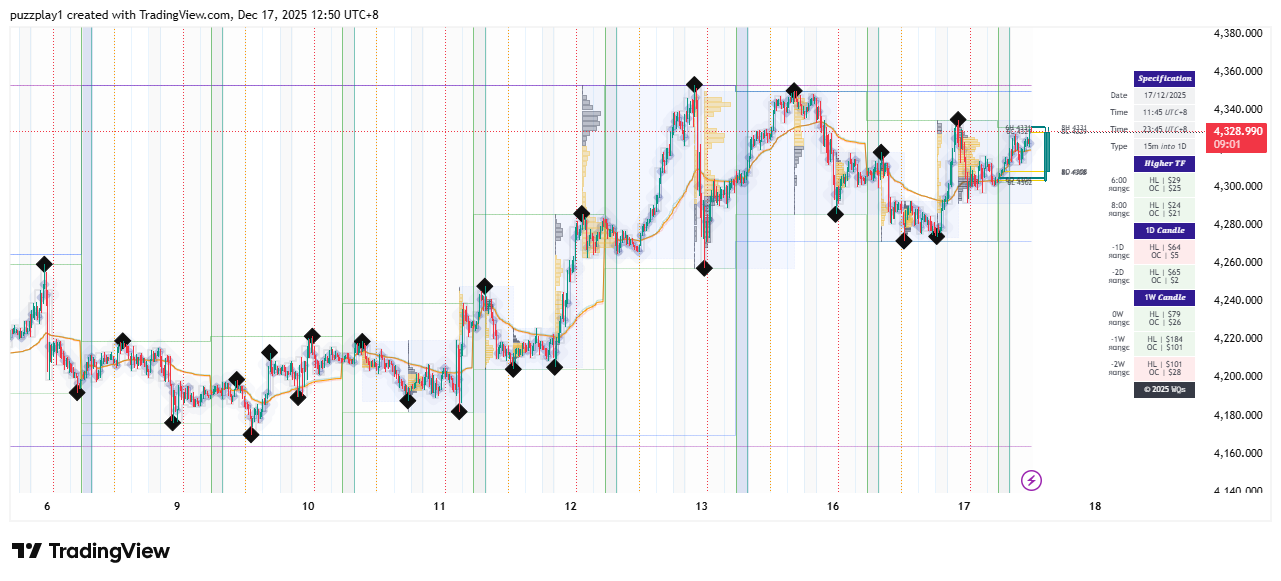